<a href="https://colab.research.google.com/github/John-Curcio/36-350/blob/master/walleye_signal_coding_test_john_curcio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Walleye Capital / Quantic - Pandas Coding Test

Below, you will be asked to complete a series of coding tasks of ascending complexity. Please consider the following criteria:
- You have thirty minutes to complete this test.
- You will be judged primarily for the quality of code, not your knowledge of quant topics. High quality code is legible, standard-conformant, testable, well-documented, and of course correct.
- You may import any additional libraries or look up definitions, APIs, etc. as you deem necessary.
- Feel free to skip any questions you get stuck on, although some of them are necessary to do the later questions.
- Completing as much of the test as you can in the allotted time is more valuable than a clever and optimally performant solution.
- I am available as a resource for any questions as you go.

# Introduction / Setup

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

from tqdm import tqdm

# feel free to import anything else you might want.

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [27]:
import requests, zipfile, io
r = requests.get('https://github.com/wwang-walleye/walleye-coding-test-data/blob/main/ct-data.zip?raw=true') 
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()

univ = pd.read_csv(z.open('coding-test-u.csv'))
brtn = pd.read_csv(z.open('coding-test-bd1.csv'))

Below, please find two dataframes as follows:

`univ` is a dataframe which specifies an investment universe over 2 years of contiguous trading days. The columns have the following definitions:
1. `date` - hopefully self-explanatory.
2. `secid` - a unique identifier for a given company (analogous to ticker).
3. `gic2` - a discrete variable indicating sector membership. All secid with the same value for `gic2` are members of the same sector.

The rows matching each `date` in `univ` indicate that a given `secid` is a constituent of the universe on that `date`.

In [3]:
univ.head()

,date,secid,gic2
0,2018-06-27,4717,20
1,2018-06-27,3905,40
2,2018-06-27,3107,20
3,2018-06-27,605,55
4,2018-06-27,4656,35


`brtn` is a dataframe which specifies the trailing 1-day return of a given `secid` on a given `date`. Assume that the data in `brtn` is complete (i.e., it is not missing any trading days). Note that on a given date, any `secid` in the `brtn` dataframe may or may not be in the universe (i.e., the set of stocks in univ is a subset of the set of stocks in brtn on any given date).

In [4]:
brtn.head()

,date,secid,bd1
0,2017-06-29,2741,-0.017449
1,2017-06-29,4717,0.106220
2,2017-06-29,3905,0.027050
3,2017-06-29,3107,0.055955
4,2017-06-29,605,0.060428


# Basic pandas operations (2 points each)

Please write some code to perform the following basic tasks:
1. Print the data types in `univ` and `brtn`. Does anything look off? If so, fix that issue in-place (i.e., mutate `univ` and `brtn` accordingly).
2. Set an appropriate index on `univ` and `brtn`, and then sort by the index. Do this in-place (i.e., overwrite `univ` and `brtn`).
3. Count the number of securities in `univ` on each date.
4. Count the number of securities in each sector (`gic2`) on each date.
5. Plot the number of securities in each sector through time in an appropriate way.
6. Compute the average return for each stock in the universe on each date.

In [5]:
# Print the dtypes for both dataframes.
# Do any of the data types look inappropriate? If so, please fix them. (Hint: pandas will display string types as `object`).
print(univ.dtypes)
brtn.dtypes

date     object
secid     int64
gic2      int64
dtype: object


date      object
secid      int64
bd1      float64
dtype: object

In [40]:
univ["date"] = pd.to_datetime(univ["date"])
brtn["date"] = pd.to_datetime(brtn["date"])

In [41]:
# Set an appropriate index on univ and brtn, then sort by this index. 
# A good index should uniquely identify every row.
univ0 = univ.set_index(keys=["date", "secid"])
display(univ0)
brtn0 = brtn.set_index(keys=["date", "secid"])
display(brtn0)

gic2
date       secid      
2018-06-27 4717     20
           3905     40
           3107     20
           605      55
           4656     35
...                ...
2019-06-04 3640     45
           129      50
           3390     25
           3934     45
           1712     20

[346967 rows x 1 columns]

bd1
date       secid          
2017-06-29 2741  -0.017449
           4717   0.106220
           3905   0.027050
           3107   0.055955
           605    0.060428
...                    ...
2019-06-28 3863   0.035749
           1899  -0.000021
           1259  -0.046552
           444    0.018046
           4270  -0.029242

[2018037 rows x 1 columns]

In [8]:
# Show the number of securities in univ on each date
univ.groupby("date")["secid"].count()

date
2018-06-27    1436
2018-06-28    1438
2018-06-29    1439
2018-07-02    1440
2018-07-03    1446
              ... 
2019-06-24    1341
2019-06-25    1340
2019-06-26    1350
2019-06-27    1358
2019-06-28    1384
Name: secid, Length: 253, dtype: int64

In [9]:
# Show the number of securities in each sector on each date
univ.groupby(["date", "gic2"])["secid"].count()

date        gic2
2018-06-27  10      122
            15       88
            20      188
            25      223
            30       69
                   ... 
2019-06-28  40      173
            45      241
            50       79
            55       54
            60       30
Name: secid, Length: 2783, dtype: int64

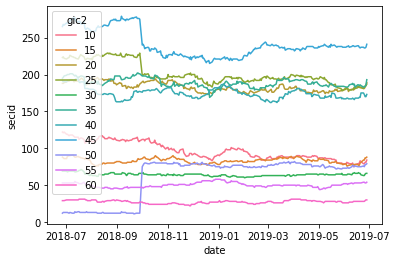

In [47]:
# Plot the number of securities in each sector over time.
foo = univ.groupby(["date", "gic2"])["secid"].count().reset_index()
foo["gic2"] = foo["gic2"].astype(str)
sns.lineplot(x="date", y="secid", hue="gic2", data=foo)

In [11]:
# Compute the average return for all stocks in `univ` by date.
fee = univ0.join(brtn0, how="left", on=["date", "secid"])
fee.groupby("date")["bd1"].mean()

date
2018-06-27   -0.011835
2018-06-28    0.002174
2018-06-29    0.000055
2018-07-02    0.002424
2018-07-03    0.001437
                ...   
2019-06-24   -0.006627
2019-06-25   -0.007624
2019-06-26   -0.002012
2019-06-27    0.014541
2019-06-28    0.011433
Name: bd1, Length: 253, dtype: float64

# More complex tasks (4 points each)
1. Write a function that does the following:
    1. Given a date `dt`, finds the subset of stocks in `univ` on `dt`. 
    2. Get the rows in `brtn` for all dates between `dt` and the 1 year prior to `dt` that match the universe as of `dt` you found in (1.1).
    3. Returns a DataFrame which contains the daily returns of all stocks in `univ` on `dt` for each of these dates found in (1.2).

2. Write a function that computes the 1-year daily beta as of `dt` for every stock in `univ` against the equally-weighted universe (i.e., the average return). Beta is a measure of risk, and it indicates how much a stock's returns covary with the universe's returns. The formula for beta is: $Beta(A,B) = Covar(A,B) / Var(B)$

3. Compute the 1-year total return for each stock in the universe as of some `dt`. Make a chart comparing this total return figure to the betas you produced by running `get_betas()`.

In [12]:
# trailing year's daily returns for the univ as of `dt`
def get_univ_brtn(dt: pd.Timestamp) -> pd.DataFrame:
    """ Returns the trailing calendar year of returns
    
    Parameters
    ----------
    dt : pd.Timestamp
    trail_cal_days : number of calendar days into the past to trail by

    Returns
    -------
    ub : pd.DataFrame or pd.Series

    """
    # Given a date dt, finds the subset of stocks in univ on dt.
    univ_dt = univ0.loc[dt]
    # Get the rows in brtn for all dates between dt and the 1 year prior to dt that match the universe as of dt you found in (1.1).
    dt_min = dt - pd.Timedelta(days=365)
    brtn_sub = brtn0.loc[dt_min:dt]
    # Returns a DataFrame which contains the daily returns of all stocks in univ_dt for each of these dates found in (1.2).
    result = univ_dt.join(brtn_sub.reset_index(level="date"), 
                          # both left and right have sec_id as index
                          how="inner")
    # sanity checks
    sec_id_to_keep = univ_dt.index 
    dt_range_to_keep = pd.date_range(start=dt_min, end=dt)
    assert set(result.index) == set(sec_id_to_keep)
    assert result["date"].isin(dt_range_to_keep).all()
    # idk, don't like how it's formatted
    return result.reset_index().set_index(["date", "secid"])["bd1"]

ub = get_univ_brtn(pd.Timestamp('2018-06-27'))
ub

date        secid
2017-06-29  7        0.075851
2017-06-30  7       -0.011060
2017-07-03  7       -0.126614
2017-07-05  7       -0.046303
2017-07-06  7        0.057684
                       ...   
2018-06-21  4805    -0.002224
2018-06-22  4805     0.040155
2018-06-25  4805     0.066764
2018-06-26  4805    -0.084566
2018-06-27  4805    -0.083496
Name: bd1, Length: 357702, dtype: float64

In [13]:
# compute 1-year trailing beta to the universe as of `dt`
def get_betas(univ_brtn: pd.DataFrame) -> pd.Series:
    """ Returns the 1-year trailing beta to the cross-sectional mean.

    Parameters
    ----------
    univ_brtn: pd.DataFrame

    Returns
    -------
    betas : pd.Series
        The beta of each security to the daily cross-sectional mean in `univ_brtn`
    """
    # need beta for each sec_id
    brtn_avg = univ_brtn.groupby("date").mean()
    denom = np.var(brtn_avg)
    # nice that pandas has its own cov fn
    numers = univ_brtn.groupby("secid").apply(lambda x: x.cov(brtn_avg))
    return numers / denom
    
betas = get_betas(ub)
betas

secid
7      -0.228291
8       1.479257
9       2.107397
10      0.413481
11      1.261985
          ...   
4794    0.830591
4797    1.784059
4802    0.614527
4803    2.008527
4805    0.404649
Name: bd1, Length: 1436, dtype: float64

[Text(0, 0.5, 'beta'), Text(0.5, 0, '1-year total return')]

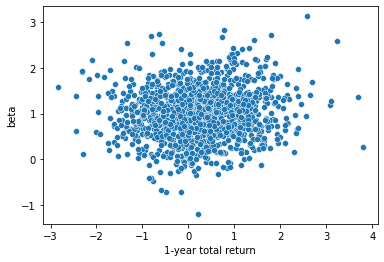

In [14]:
# plot the betas on a given date against the trailing 1-year return as of that date
# Compute the 1-year total return for each stock in the universe as of some dt. 
# Make a chart comparing this total return figure to the betas you produced by running get_betas().
univ_returns = ub.groupby("secid").sum() 
univ_returns
ax = sns.scatterplot(x=univ_returns, y=betas)
ax.set(xlabel = "1-year total return", ylabel = "beta")

# Putting it together (10 points in total)

1. Write a function that does the following:
    1. Gets the betas as of a given date.
    2. Produces the 3-month, 6-month, and 12-month trailing return as of that date *(NB: there are 252 trading days in a year)*.
    3. Adjusts the trailing returns for beta and sector (`gic2`) in a way that you think is reasonable.
    4. Normalizes the resulting signals in a way you think is reasonable.
    5. Produces a 4th signal that combines the 3 signals above in a reasonable way.

3. Find the last date of each month in your data set, and produce the signal for each of those month-end dates.

4. For extra credit, perform some perfunctory analysis on your result.

In [195]:
from statsmodels.multivariate.pca import PCA

def make_fourth_signal(sigs):
    # returns_91d, returns_182d, returns_365d will obviously covary,
    # because their ranges overlap. otherwise doing PCA on them will just
    # give us the data shared between all of them - returns_91d
    X = np.matrix([
      sigs["returns_91d"],
      sigs["returns_365d"] - sigs["returns_182d"], # returns over (dt - 182d):(dt - 365d)
      sigs["returns_182d"] - sigs["returns_91d"], # returns over (dt - 91d):(dt - 182d)
    ]).T
    pc = PCA(X, ncomp=2)
    return sigs.assign(signal_combo=pc.scores[:,1])
    
    # sigs = sigs.assign(returns_365d=(sigs["returns_365d"] - sigs["returns_182d"]))
    # sigs = sigs.assign(returns_182d=(sigs["returns_182d"] - sigs["returns_91d"]))
    # # so now returns_91d corresponds to returns over range dt:(dt - 91d)
    # # returns_182d corresponds to returns over (dt - 91d):(dt - 182d)
    # # returns_365d corresponds to returns over (dt - 182d):(dt - 365d)
    # # now we project all these onto the first principal component
    # pc = PCA(sigs, ncomp=1)
    # return sigs.assign(signal_combo=pc.scores)
    # i think the first principal component generally corresponds to overall market returns
    # but that and sector have already been removed (hopefully), so i'm not sure what this will "be"

def make_signals(dt: pd.Timestamp) -> pd.DataFrame:
    """
    Parameters
    ----------
    dt : pd.Timestamp

    Returns
    -------
    sigs : pd.DataFrame
    """
    # get betas as of dt 
    univ_brtn = get_univ_brtn(dt)
    betas = get_betas(univ_brtn)
    trailing_returns = pd.DataFrame(univ_brtn)
    # revision to the GIC classification occurred on 2018-08-28, use an earlier date
    univ_temp = univ0.loc[pd.Timestamp("2018-08-27")] 
    trailing_returns = trailing_returns.join(univ_temp, how="left")

    # preserve the (date, secid) index
    market_returns = trailing_returns.groupby("date")["bd1"].transform("mean")
    # beta * market_return is "expected return given efficient market"
    # so returns - beta * market_return is "returns not explained by overall market"
    trailing_returns["bd1_adj"] = trailing_returns["bd1"] - (market_returns * betas)

    # use the same idea when adjusting for gic2
    gic2_betas = trailing_returns.groupby(["gic2"])["bd1_adj"].apply(get_betas)
    gic2_returns = trailing_returns.groupby(["date", "gic2"])["bd1_adj"].transform("mean")
    trailing_returns["bd1_adj"] = trailing_returns["bd1_adj"] - gic2_returns * betas
    sigs = pd.DataFrame({}, index=betas.index) # indexed by secids appearing on dt

    for trail_cal_days in [(365 // 4), (365 // 2), 365]:
        dt_min = dt - pd.Timedelta(days=trail_cal_days)
        mask = trailing_returns.index.get_level_values("date")
        mask = (mask <= dt) & (mask > dt_min)
        discounted_total_returns = trailing_returns.loc[mask].groupby("secid")["bd1_adj"].sum()
        sigs["returns_%dd"%trail_cal_days] = discounted_total_returns

    # Produces a 4th signal that combines the 3 signals above in a reasonable way.
    sigs = make_fourth_signal(sigs)
    return sigs
    
sigs = make_signals(pd.Timestamp('2018-06-27'))
sigs

,returns_91d,returns_182d,returns_365d,signal_combo
secid,,,,
7,0.390841,-0.503656,-0.139309,0.064788
8,-0.784067,-0.472244,-0.406641,-0.048157
9,-0.605151,-0.522794,-0.137217,-0.026967
10,0.828566,1.160894,1.527403,0.018648
11,0.351313,-0.308038,-0.153117,0.049661
...,...,...,...,...
4794,-0.590696,-1.314130,-1.360083,0.013213
4797,-0.115261,-0.824915,-1.320684,0.029366
4802,-0.930289,-2.028196,-2.598346,0.015800


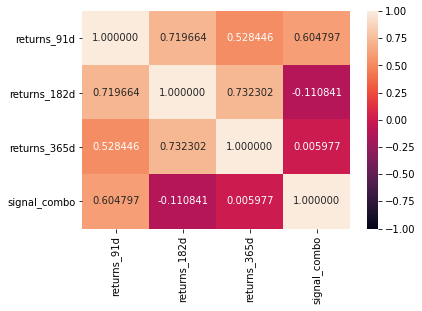

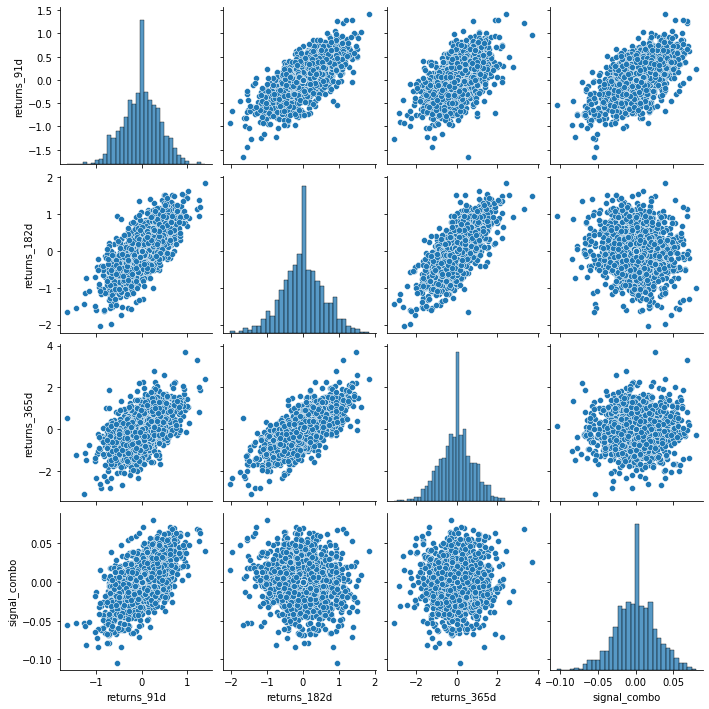

In [197]:
sns.pairplot(sigs)

In [186]:
# Produce the set of month-end dates
# https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#timeseries-offset-aliases
# freq = "M" gives you month end dates, "MS" gives you start dates. boy that's weird
month_end_dates = pd.Series(pd.date_range("2018-06-27", "2019-06-04", freq="M"))
# round down to latest trading day
days_from_weekday = np.maximum(0, month_end_dates.dt.dayofweek - 4)
month_end_trading_dates = month_end_dates - days_from_weekday * pd.Timedelta("1D")
month_end_trading_dates

0    2018-06-29
1    2018-07-31
2    2018-08-31
3    2018-09-28
4    2018-10-31
5    2018-11-30
6    2018-12-31
7    2019-01-31
8    2019-02-28
9    2019-03-29
10   2019-04-30
11   2019-05-31
dtype: datetime64[ns]

In [209]:
# Create a dataframe with the signals as of each month-end date
# indexed by (date, secid)
sig_df = month_end_trading_dates.apply(make_signals)
sig_df = pd.concat(list(sig_df), keys=month_end_trading_dates)
sig_df

returns_91d  returns_182d  returns_365d  signal_combo
           secid                                                       
2018-06-29 7         0.301026     -0.438019     -0.236840      0.048365
           8        -0.760245     -0.490755     -0.382875     -0.049038
           9        -0.534216     -0.419285     -0.035228     -0.031363
           10        0.831037      1.014599      1.559105      0.030609
           11        0.156042     -0.514994     -0.379914      0.038349
...                       ...           ...           ...           ...
2019-05-31 4785      0.126251     -0.909026     -1.283818      0.069573
           4787     -0.460265     -0.964051     -2.069837      0.057971
           4794      0.184342     -0.247297     -0.800500      0.039111
           4803     -0.412814      0.068214     -0.767537     -0.006021
           4805     -0.047616     -0.650065      0.640840      0.002094

[16453 rows x 4 columns]

In [210]:
sig_df.columns

Index(['returns_91d', 'returns_182d', 'returns_365d', 'signal_combo'], dtype='object')

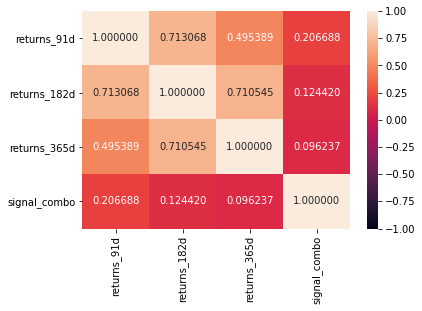

In [211]:
# Do some additional analysis -- what can you tell us about the signal you've created?
sns.heatmap(sig_df.corr(), vmin=-1, vmax=1, annot=True, fmt="f")

# what can you tell us about the signal you've created?

Thoughts behind this signal:
* Part of the reason why 3-month, 6-month, 12-month returns covary is because they have overlapping ranges. 

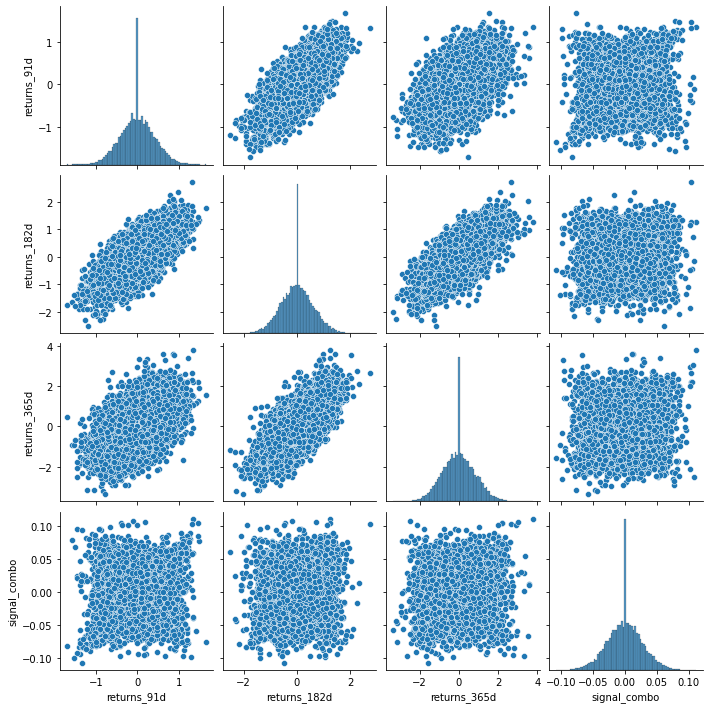

In [212]:
sns.pairplot(sig_df)